In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Checking the null values

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

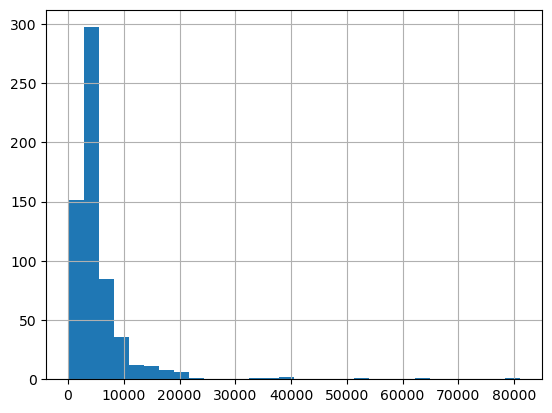

In [7]:
df['ApplicantIncome'].hist(bins=30)

<Axes: >

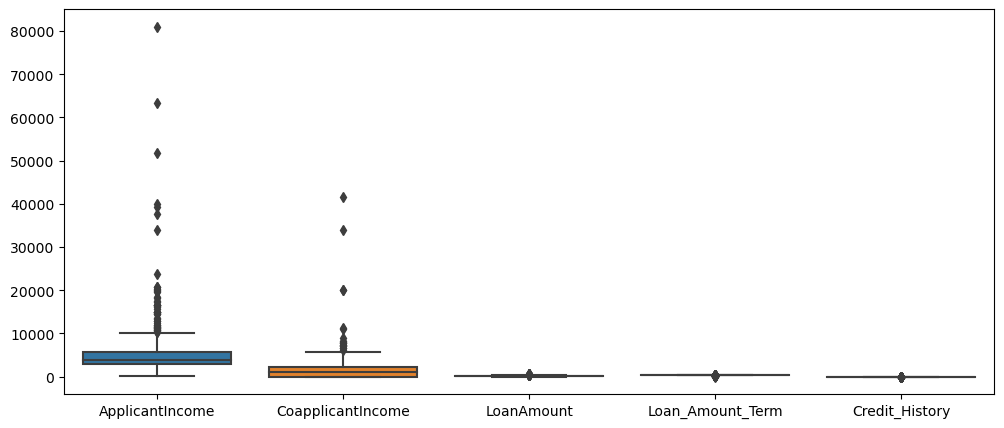

In [8]:
#Checking the null values
plt.figure(figsize=(12,5))
sns.boxplot(data=df)

In [9]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
#Fill the null values of numeric data types
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].median())


In [11]:
#Fill the null values of numeric data types
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [12]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: >

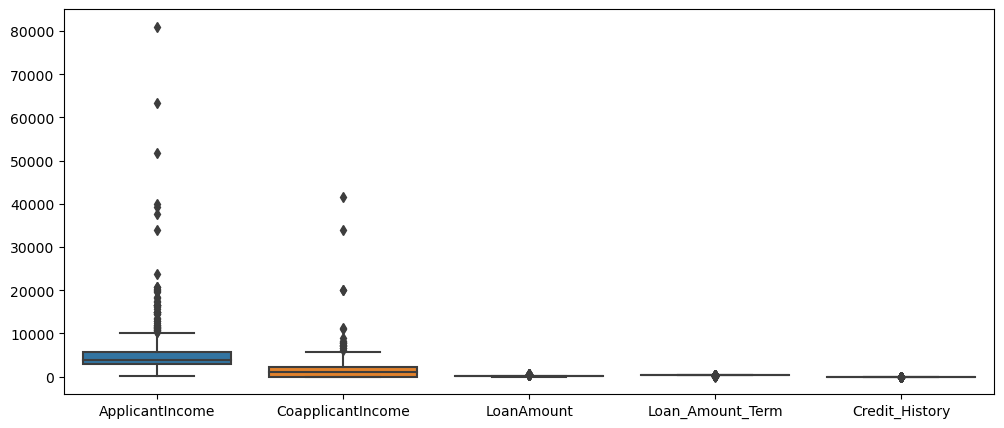

In [13]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df)

In [14]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']
df['TotalIncome_log']=np.log(df['TotalIncome'])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,7.972466
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,8.320205
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,9.025456
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0,8.933664


<Axes: >

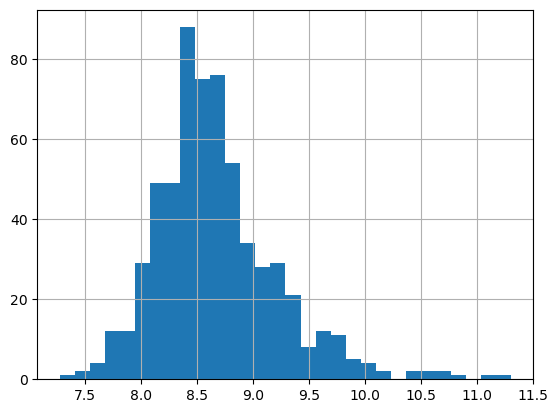

In [15]:
#Plotting histogra of totalincomelog
df['TotalIncome_log'].hist(bins=30)

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699515


In [18]:
X=df.drop('Loan_Status',axis=1).values

In [19]:
y=df['Loan_Status'].values


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [21]:
print(X_train)

[['LP001273' 'Male' 'Yes' ... 'Semiurban' 8250.0 9.017968479328726]
 ['LP001316' 'Male' 'Yes' ... 'Semiurban' 5858.0 8.675563527387679]
 ['LP001758' 'Male' 'Yes' ... 'Semiurban' 7945.0 8.980298078970817]
 ...
 ['LP001888' 'Female' 'No' ... 'Urban' 3237.0 8.082402253926244]
 ['LP002393' 'Female' 'Yes' ... 'Semiurban' 10047.0 9.215029361462314]
 ['LP001350' 'Male' 'Yes' ... 'Urban' 13650.0 9.521494800613105]]


In [22]:
print(y_train)

['N' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'N'
 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'N' 'N' 'N' 'Y' 'Y' 'Y'
 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y'
 'Y' 'Y' 'N' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'N'
 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N'
 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'N'
 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y'
 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y

In [23]:
print(X_test)

[['LP002139' 'Male' 'Yes' ... 'Semiurban' 9083.0 9.114159813502214]
 ['LP002223' 'Male' 'Yes' ... 'Semiurban' 4310.0 8.368693183097793]
 ['LP001570' 'Male' 'Yes' ... 'Rural' 5614.0 8.633018756921828]
 ...
 ['LP001824' 'Male' 'Yes' ... 'Semiurban' 4725.0 8.460622839927844]
 ['LP001027' 'Male' 'Yes' ... 'Urban' 4340.0 8.375629627094451]
 ['LP002101' 'Male' 'Yes' ... 'Urban' 63337.0 11.05622495553552]]


In [24]:
print(y_test)

['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N'
 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'Y' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'Y'
 'N' 'N' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'N'
 'N' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y']


In [25]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
label

LabelEncoder()

In [26]:
cols=['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
for i in cols:
    df[i]=label.fit_transform(df[i])

In [27]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_log
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1,5849.0,8.674026
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0,8.714568
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0,8.006368
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0,8.505323
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0,8.699515


In [28]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)


ValueError: could not convert string to float: 'LP001273'

In [ ]:
print(X_train)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
dtree=model.fit(X_train,y_train)

In [ ]:
y_pred=dtree.predict(X_test)
y_pred

In [ ]:
dict={'ACTUAL':y_test,'PREDICTED':y_pred}
d=pd.DataFrame(dict)
d

In [ ]:
from sklearn import metrics
print(f"The accuracy is {metrics.accuracy_score(y_pred,y_test)*100}")

In [ ]:
from sklearn.naive_bayes import GaussianNB
model1=GaussianNB()
nb=model1.fit(X_train,y_train)


In [ ]:
y1_pred=nb.predict(X_test)

In [ ]:
from sklearn import metrics
print(f"The accuracy is {metrics.accuracy_score(y1_pred,y_test)*100}")